# Clara Martinez

# PRISE EN MAIN du MINI-PROJET : les questions à se poser
Pour vous guider dans votre analyse, voici les étapes clés que vous suivrez. Chaque étape s'appuie sur la précédente pour transformer des données brutes en conclusions pertinentes.

# Étape 1 : Exploration et Premier Diagnostic
L'objectif ici est de "faire connaissance" avec vos données.
Prise en main : Chargez vos données et posez-vous les premières questions : Combien de lignes et de colonnes ? Quels sont les types de données ?
Contrôle Qualité : Vérifiez la propreté de base du jeu de données. Y a-t-il des valeurs manquantes ou des lignes en double ?
Premières Observations : Explorez visuellement les relations entre les variables. Y a-t-il des corrélations évidentes qui sautent aux yeux ?

# Étape 2 : Nettoyage et Préparation des Données
Ici, vous vous attaquez aux imperfections des données pour les rendre analysables.
Détection des Anomalies : Visualisez la distribution de chaque variable. Identifiez celles qui sont très asymétriques ou qui présentent des valeurs extrêmes (outliers).
Transformation : Appliquez des transformations mathématiques (comme le logarithme) pour normaliser les distributions et réduire l'impact des outliers.
Ajustements : Parfois, une simple transformation ne suffit pas. Soyez prêt à utiliser des techniques plus ciblées pour traiter les valeurs extrêmes restantes.

# Étape 3 : Investigation d'un Comportement Complexe
C'est le moment de jouer au détective avec une variable qui semble se comporter étrangement.
Identifier le Mystère : En observant une distribution, vous pourriez remarquer un comportement inhabituel, comme la présence de plusieurs "pics" (bimodalité).
Chercher la Cause : D'où vient ce comportement ? Est-il lié à une autre variable, comme le temps ou une catégorie spécifique ?
Valider avec des Tests : Utilisez des tests statistiques pour confirmer que les sous-groupes que vous avez identifiés ont bien des distributions différentes.
Appliquer une Solution Ciblée : Une fois le problème compris, traitez chaque sous-groupe de manière appropriée pour corriger sa distribution.

# Étape 4 : Construction du Jeu de Données Final
Cette étape consiste à consolider votre travail de préparation.
Sélection : Choisissez les colonnes les plus pertinentes pour la suite de l'analyse (les versions nettoyées et transformées).
Finalisation : Créez un nouveau DataFrame propre, structuré et prêt à être utilisé pour l'analyse statistique et la modélisation.

# Étape 5 : Analyse Approfondie pour Extraire des Conclusions
Maintenant que vos données sont fiables, vous pouvez enfin répondre à des questions métier.
Analyse Temporelle : Visualisez l'évolution de vos variables clés dans le temps pour identifier des tendances de fond.
Tests d'Hypothèses : Posez une question précise (ex: "Y a-t-il une différence significative entre deux périodes ?") et utilisez un test statistique (comme le t-test) pour y répondre de manière rigoureuse.
Recherche de Relations Subtiles : Allez plus loin que les corrélations de base. En lissant les données (par ex. avec des moyennes mobiles), vous pourriez découvrir des relations plus profondes entre les variables.

# WK4_DAY_4XP: June 26th, 2025
    # Day Mini Project: Advanced Statistical A.
    # Mini-project: Advanced Statistical Analysis of Apple Inc. Stock Data
# Project Description
Using the AAPL (Apple Inc.) stock dataset, conduct the following analyses:

In [1]:
# IMPORTS GLOBAUX
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, f_oneway, binom, pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import scipy.linalg as la

In [ ]:
# 📂 I. Data Loading and Exploration
    # I.1. Data Loading
df = pd.read_csv("Apple Stock Prices (1981 to 2023).csv")


In [ ]:
# I.2. Exploration
# General info on df dataframe :
print(df.head())        # upper part (5 upper rows) of the df

         Date      Open      High       Low     Close  Adj Close    Volume
0  02/01/1981  0.154018  0.155134  0.154018  0.154018   0.119849  21660800
1  05/01/1981  0.151228  0.151228  0.150670  0.150670   0.117244  35728000
2  06/01/1981  0.144531  0.144531  0.143973  0.143973   0.112032  45158400
3  07/01/1981  0.138393  0.138393  0.137835  0.137835   0.107256  55686400
4  08/01/1981  0.135603  0.135603  0.135045  0.135045   0.105085  39827200


In [ ]:
# Number of rows & columns :
df.shape

(10608, 7)

In [ ]:
print(df.tail())    # bottom part (5 bottom rows) of the df

             Date        Open        High         Low       Close   Adj Close  \
10603  23/01/2023  138.119995  143.320007  137.899994  141.110001  141.110001   
10604  24/01/2023  140.309998  143.160004  140.300003  142.529999  142.529999   
10605  25/01/2023  140.889999  142.429993  138.809998  141.860001  141.860001   
10606  26/01/2023  143.169998  144.250000  141.899994  143.960007  143.960007   
10607  27/01/2023  143.160004  147.229996  143.080002  145.929993  145.929993   

         Volume  
10603  81760300  
10604  66435100  
10605  65799300  
10606  54105100  
10607  70492800  


# Comments : 
    # through df.head() and df.tail(), we can see that the data are collected from Jan 2nd 1981 to Jan 27th 2023. A large period indeed!

In [42]:
print(df.info()) 
# 1 column has an object - date - format, 1 is completed with int, all others are with float64.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10608 entries, 1981-01-02 to 2023-01-27
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10608 non-null  float64
 1   High       10608 non-null  float64
 2   Low        10608 non-null  float64
 3   Close      10608 non-null  float64
 4   Adj Close  10608 non-null  float64
 5   Volume     10608 non-null  int64  
 6   Year       10608 non-null  int32  
 7   Month      10608 non-null  int32  
 8   Decade     10608 non-null  int32  
 9   Range      10608 non-null  float64
 10  SMA50      10559 non-null  float64
 11  SMA200     10409 non-null  float64
dtypes: float64(8), int32(3), int64(1)
memory usage: 953.1 KB
None


In [22]:
# Date conversion :
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [72]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10608 non-null  datetime64[ns]
 1   Open          10608 non-null  float64       
 2   High          10608 non-null  float64       
 3   Low           10608 non-null  float64       
 4   Close         10608 non-null  float64       
 5   Adj Close     10608 non-null  float64       
 6   Volume        10608 non-null  int64         
 7   Year          10608 non-null  int32         
 8   Month         10608 non-null  int32         
 9   Decade        10608 non-null  int32         
 10  Range         10608 non-null  float64       
 11  SMA50         10559 non-null  float64       
 12  SMA200        10409 non-null  float64       
 13  Daily Return  10607 non-null  float64       
 14  SMA20         10589 non-null  float64       
 15  SMA100        10509 non-null  float6

In [73]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Year',
       'Month', 'Decade', 'Range', 'SMA50', 'SMA200', 'Daily Return', 'SMA20',
       'SMA100'],
      dtype='object')


In [74]:
print(df.index)

RangeIndex(start=0, stop=10608, step=1)


In [15]:
print(df.describe())

               Open          High           Low         Close     Adj Close  \
count  10608.000000  10608.000000  10608.000000  10608.000000  10608.000000   
mean      16.689173     16.879955     16.500822     16.697362     16.027345   
std       35.450519     35.882848     35.031289     35.473912     35.154878   
min        0.049665      0.049665      0.049107      0.049107      0.038213   
25%        0.287946      0.296875      0.282355      0.288923      0.238909   
50%        0.488839      0.495536      0.480446      0.487701      0.404851   
75%       16.320893     16.418483     16.151249     16.269554     14.073167   
max      182.630005    182.940002    179.119995    182.009995    180.959747   

             Volume  
count  1.060800e+04  
mean   3.275098e+08  
std    3.378203e+08  
min    0.000000e+00  
25%    1.213044e+08  
50%    2.145976e+08  
75%    4.066804e+08  
max    7.421641e+09  


In [ ]:
print(df.isnull().sum())

# No column with NaN, ie missing values.  

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
print(df.dropna)

In [ ]:
print(df.tail()) 
print(df.info()) 
print(df.columns)
print(df.index)
print(df.describe())
print(df.isnull().sum())
print(df.dropna)

# Date conversion :
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [23]:
# Adding new 'Year', 'Month', 'Date' columns :

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Decade'] = (df['Year'] // 10) * 10

In [29]:
# Aggregation
    # per Year (as to get yearly means) :
df_grouped_year = df.groupby('Year').mean().reset_index()
    # per Decade :
df_grouped_decade = df.groupby('Decade').mean().reset_index()

# 1st sight comments on Apple Stock Prices Dataframe (from 1981 to 2023) :
    - Original dataframe seems very homogeneous, with no NaN values, a limited number of columns with hardly no useless column. Only "Close" and "Adj Close" might be redundant for most of the cases. And on the longtime, they might share close trends and statistics.

In [ ]:
# 📂 II. Data Visualization
!pip install plotly
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [68]:
# Prepare data and create plot :
import plotly.graph_objects as go

# Date column conversion (if not yet done)
df['Date'] = pd.to_datetime(df['Date'])

# Candlestick plot creation : 
fig = go.Figure(data=[go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name="Apple Stock"
)])

# Display :
fig.update_layout(
    title="Apple Stock Price (Candlestick)",
    xaxis_title="Date",
    yaxis_title="Prix",
    xaxis_rangeslider_visible=False
)

fig.show()


# Comment : candlestick plot very clearly highlights APPLE stock dramatic surge between 2008 and 2018, then between 2020 and 2022.

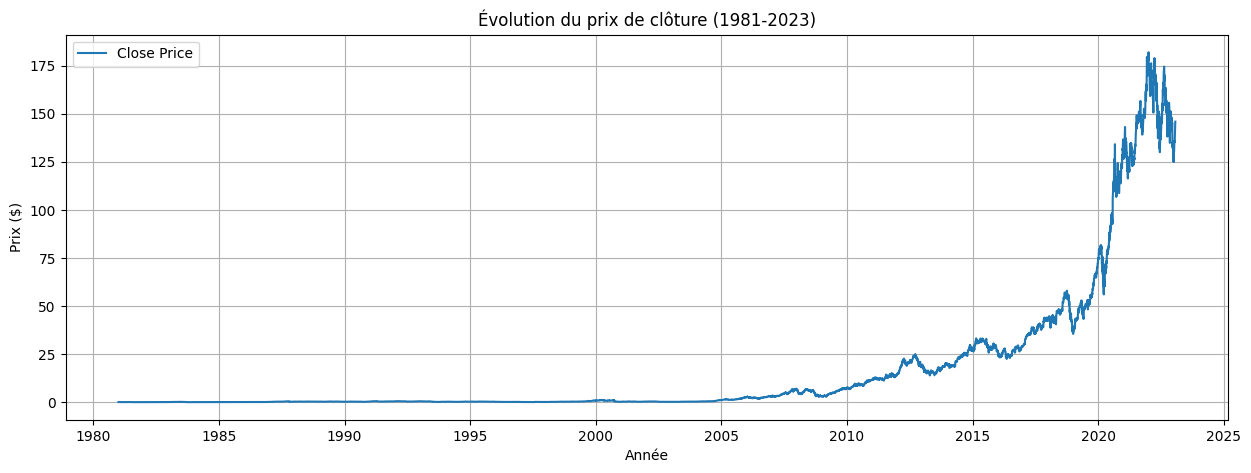

In [69]:
# Price Trend Analysis Over Time

plt.figure(figsize=(15,5))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title("Évolution du prix de clôture (1981-2023)")
plt.xlabel("Année")
plt.ylabel("Prix ($)")
plt.legend()
plt.grid(True)
plt.show()

<Axes: title={'center': 'Prix de clôture annuel moyen'}, xlabel='Date'>

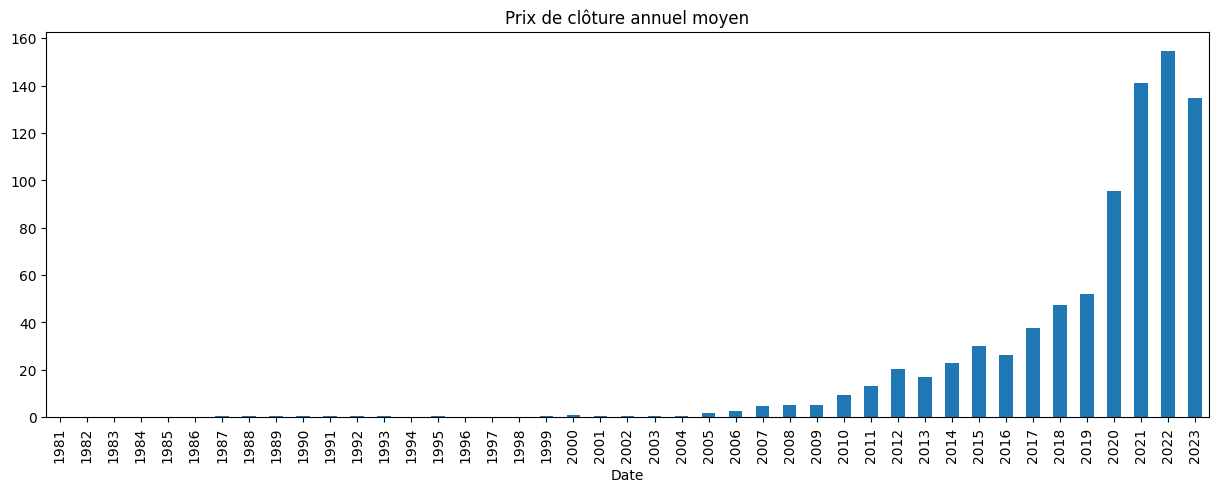

In [31]:
# Yearly average closing price :
df_yearly = df.groupby(df['Date'].dt.year)['Close'].mean()
df_yearly.plot(kind='bar', figsize=(15,5), title='Prix de clôture annuel moyen')

# Comment : the yearly average histogram above is very meaningful, as it claerly highlights year on year evolution, with surge appearing from 2005 on, dramatic increase with slow down and acceleration steps, year on year. A more in depth analysis would establish connexion with APPLE major events (new products, etc), profit and sales.

Text(0.5, 1.0, 'Volume de transactions (1981-2023)')

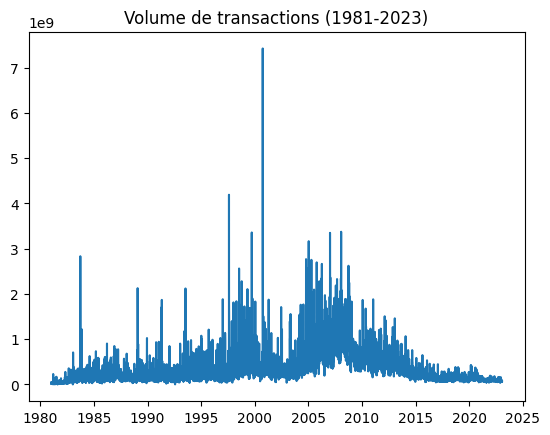

In [33]:
# Yearly transaction volumes :
plt.plot(df['Date'], df['Volume'])
plt.title("Volume de transactions (1981-2023)")

# Comment : the highest peak ever is quite surprisingly not situated in the surge period (after 2005 or 2008), but before, in the year 2000 or 2001. Might be related to either the dot comm or the 9.11 stock exchange plunge.

<Axes: title={'center': 'Volume moyen par mois'}, xlabel='Month'>

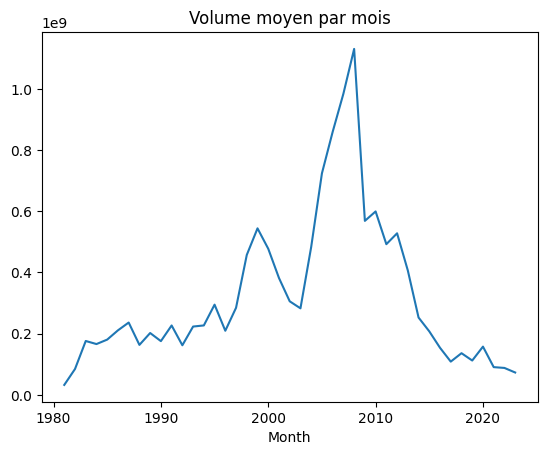

In [36]:
# Monthly / Yearly volume average : 
df['Month'] = df['Date'].dt.year
df.groupby('Month')['Volume'].mean().plot(title='Volume moyen par mois')

<Axes: title={'center': 'Volume moyen par année'}, xlabel='Year'>

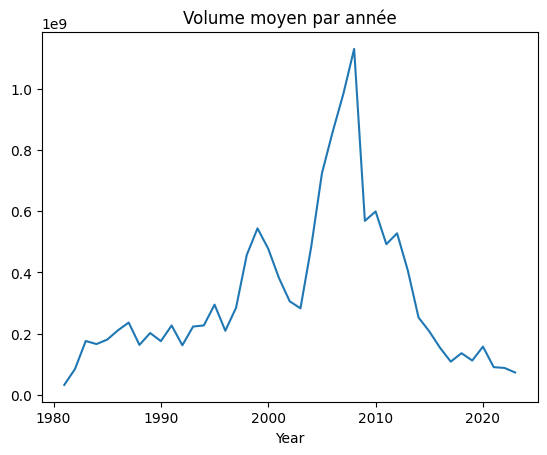

In [37]:
df['Year'] = df['Date'].dt.year
df.groupby('Year')['Volume'].mean().plot(title='Volume moyen par année')

<Axes: title={'center': 'Prix moyen par décennie'}, xlabel='Decade'>

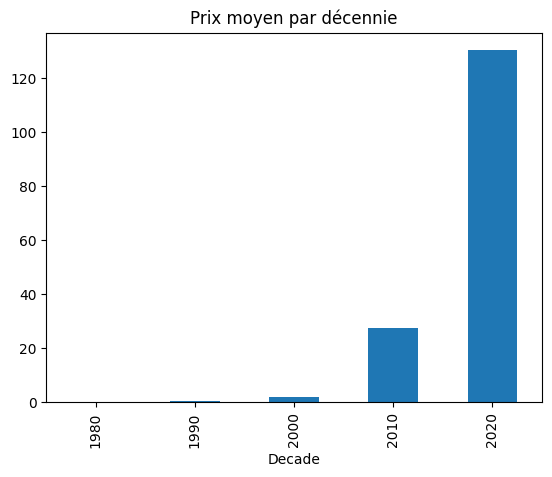

In [53]:
# Analysis per decades :
df.groupby('Decade')['Close'].mean().plot(kind='bar', title="Prix moyen par décennie")

In [ ]:
# Variability and volatility :
    # Daily gaps (High - Low) :
df['Range'] = df['High'] - df['Low']
df['Range'].plot(title="Amplitude journalière des cours")


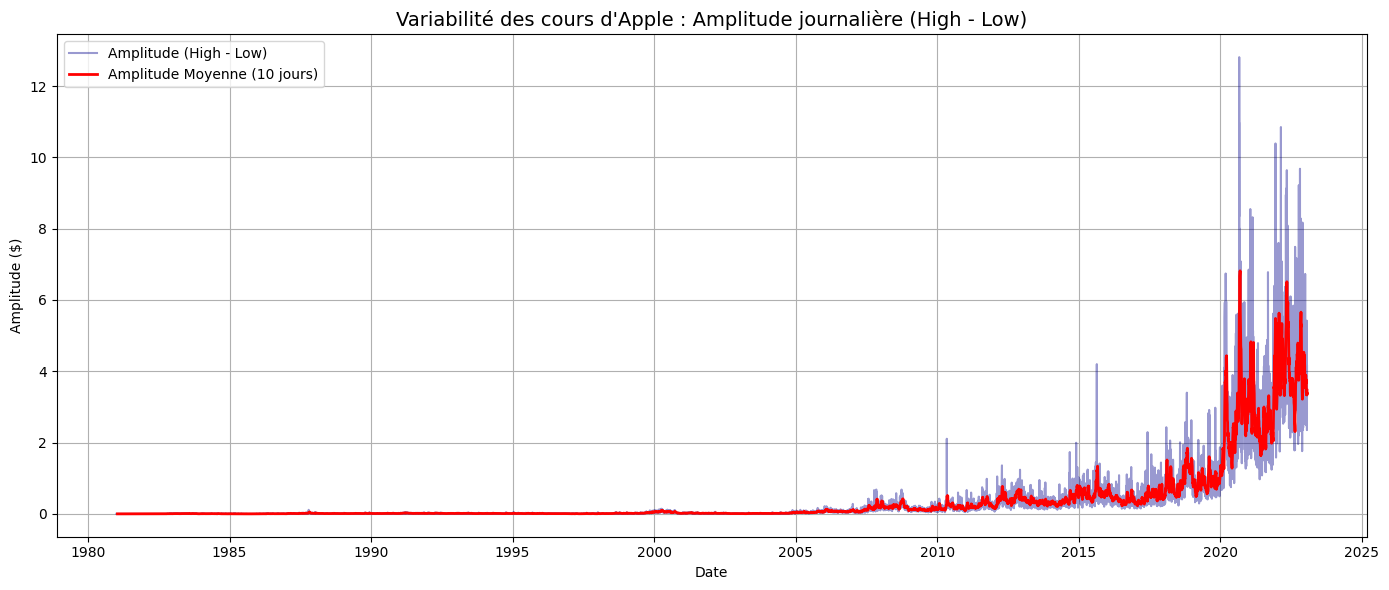

In [ ]:
# Plot creation :
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Range'], color='darkblue', alpha=0.4, label='Amplitude (High - Low)')

# Improved readability option (with 10 day-rolling average)
df['Range_Smooth'] = df['Range'].rolling(window=10).mean()
plt.plot(df['Date'], df['Range_Smooth'], color='red', linewidth=2, label='Amplitude Moyenne (10 jours)')

# Display :
plt.title("Variabilité des cours d'Apple : Amplitude journalière (High - Low)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Amplitude ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Double check that df['Date'] is well at datetime format :
fig = go.Figure(data=[go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name="Cours Apple"
)])

# Adding visual 
fig.add_vrect(x0="2008-01-01", x1="2018-12-31", 
              annotation_text="Hausse majeure 2008-2018", annotation_position="top left",
              fillcolor="LightSalmon", opacity=0.3, line_width=0)

fig.add_vrect(x0="2020-01-01", x1="2022-12-31", 
              annotation_text="Rally 2020-2022", annotation_position="top right",
              fillcolor="LightGreen", opacity=0.3, line_width=0)

# Improved display :
fig.update_layout(
    title="Évolution du cours de l'action APPLE (1981–2023) - Chandeliers",
    xaxis_title="Date",
    yaxis_title="Prix ($)",
    xaxis_rangeslider_visible=False,
    template="plotly_white",
    annotations=[
        dict(x='2013-01-01', y=max(df['High']),
             text="Commentaire : forte progression 2008-2018, puis 2020-2022",
             showarrow=False, font=dict(size=12), yanchor="top")
    ]
)

fig.show()

C:\Users\cibei\AppData\Local\Temp\ipykernel_42776\3840923199.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  volatility_monthly = df['Close'].resample('M').std()


<Axes: title={'center': 'Volatilité mensuelle (écart-type)'}, xlabel='Date'>

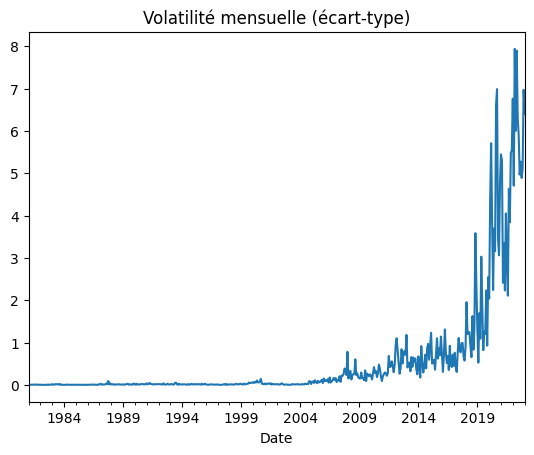

In [39]:
# Monthly volatility (tandard deviation) :
df.set_index('Date', inplace=True)
volatility_monthly = df['Close'].resample('M').std()
volatility_monthly.plot(title="Volatilité mensuelle (écart-type)")

Text(0.5, 1.0, 'Prix vs Moyennes Mobiles')

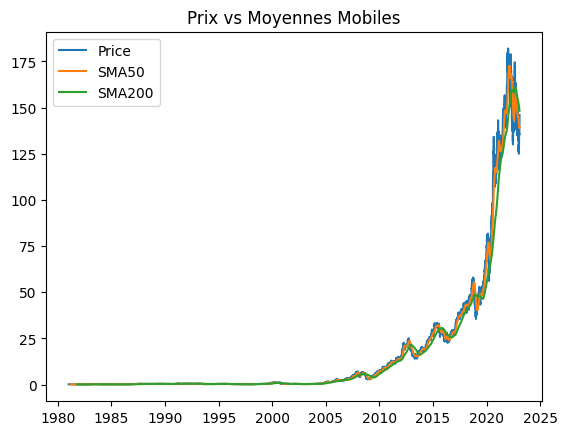

In [79]:
# Rolling averages :
    # 50 days and 200 days rolling averages 

df['SMA50'] = df['Close'].rolling(window=50).mean()
df['SMA200'] = df['Close'].rolling(window=200).mean()

plt.plot(df['Date'], df['Close'], label='Price')
plt.plot(df['Date'], df['SMA50'], label='SMA50')
plt.plot(df['Date'], df['SMA200'], label='SMA200')
plt.legend()
plt.title("Prix vs Moyennes Mobiles")

# Message d'erreur lié à l'absence de reconnaissance de 'Date', probablement suite aux opérations de regroupement en "Month", "Year", "Decade".

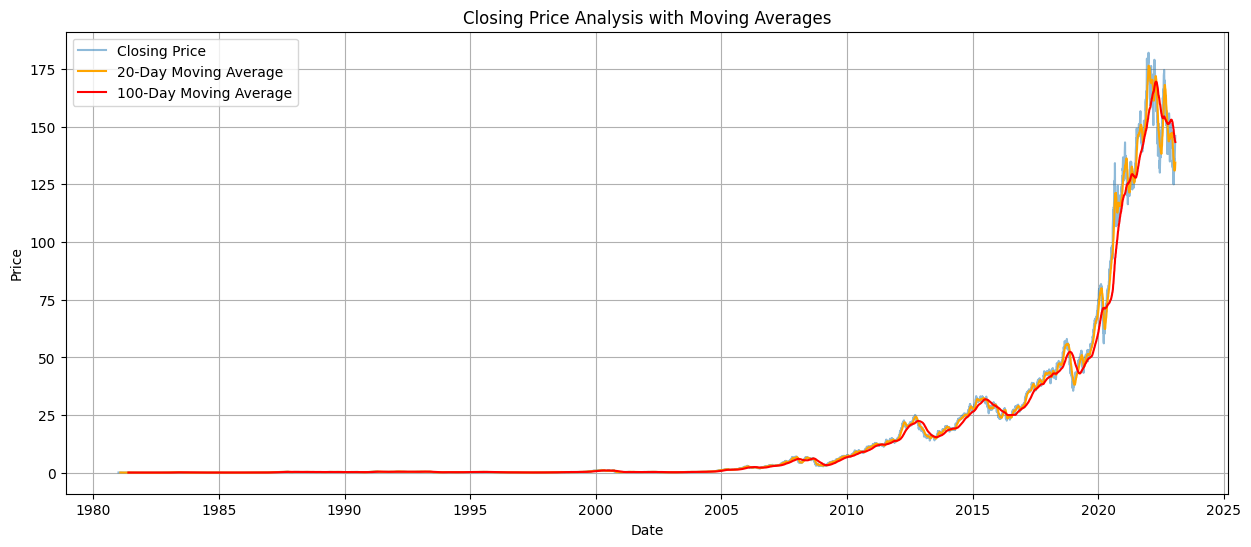

In [80]:
# Rolling averages to Closing Prices :
    # Calculate the Moving Average : 
        # SMA 20 (short period)
        # SMA 100 (medium period)

df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA100'] = df['Close'].rolling(window=100).mean()

    # Plot the Curves with Matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.plot(df['Date'], df['Close'], label='Closing Price', alpha=0.5)
plt.plot(df['Date'], df['SMA20'], label='20-Day Moving Average', color='orange')
plt.plot(df['Date'], df['SMA100'], label='100-Day Moving Average', color='red')
plt.title("Closing Price Analysis with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Interpretation: 
    # If the SMA20 crosses above the SMA100 → potential buy signal
    # If the SMA20 crosses below → potential sell signal


Text(0.5, 1.0, 'Corrélation entre variables financières')

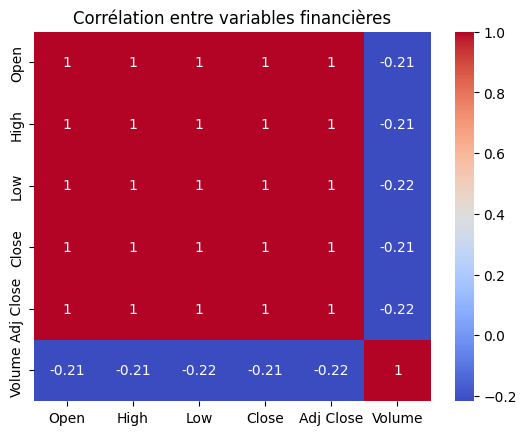

In [43]:
# Column corrélations :

import seaborn as sns
sns.heatmap(df[['Open','High','Low','Close','Adj Close','Volume']].corr(), annot=True, cmap='coolwarm')
plt.title("Corrélation entre variables financières")

# Comment : not surprisingly enough, except for volumes, the correlation between stock values ('Open', 'High', 'Low', 'Close', 'Adj Cmose') are at their max. 

In [49]:
# 🔢 III. Statistical Analysis
    # III.1. Step 1 - Extract descriptive insights and key characteristics from stock prices.
        # a. Measures of central tendency and dispersion
                # Mean, median, min, max, standard deviation
df[['Open', 'Close', 'High', 'Low', 'Volume']].describe()

# Comment : This gives you an overview: general trend, spread, and extreme values.

,Open,Close,High,Low,Volume
count,10608.000000,10608.000000,10608.000000,10608.000000,1.060800e+04
mean,16.689173,16.697362,16.879955,16.500822,3.275098e+08
std,35.450519,35.473912,35.882848,35.031289,3.378203e+08
min,0.049665,0.049107,0.049665,0.049107,0.000000e+00
25%,0.287946,0.288923,0.296875,0.282355,1.213044e+08
50%,0.488839,0.487701,0.495536,0.480446,2.145976e+08
75%,16.320893,16.269554,16.418483,16.151249,4.066804e+08
max,182.630005,182.009995,182.940002,179.119995,7.421641e+09


In [50]:
        # b. Skewness and Kurtosis
                # Skewness: indicates whether the distribution leans to the left or right.
                # Kurtosis: indicates whether the distribution is "peaked" (frequent extreme values).

from scipy.stats import skew, kurtosis

print("Skewness:", skew(df['Close']))
print("Kurtosis:", kurtosis(df['Close']))

Skewness: 2.873265586829748
Kurtosis: 7.7761049504944335


# Comment : 

Skewness: 2.87. This value > 0 is showing asymetry to the right, ie orientation to high profits.

Kurtosis: 7.7761049504944335. 
Kurtosis measures the proportion of extreme values compared to a normal distribution. With a value >0, and 
particularly over 3 (as here), it indicates higher peaks, fat tails (frequent extreme values).
This high level of kurtosis expresses that said stock is more likely extreme volatility → watch for outliers

In [ ]:
        # c. Distribution of daily returns

df['Daily Return'] = df['Close'].pct_change()
df['Daily Return'].hist(bins=100, figsize=(10,5))

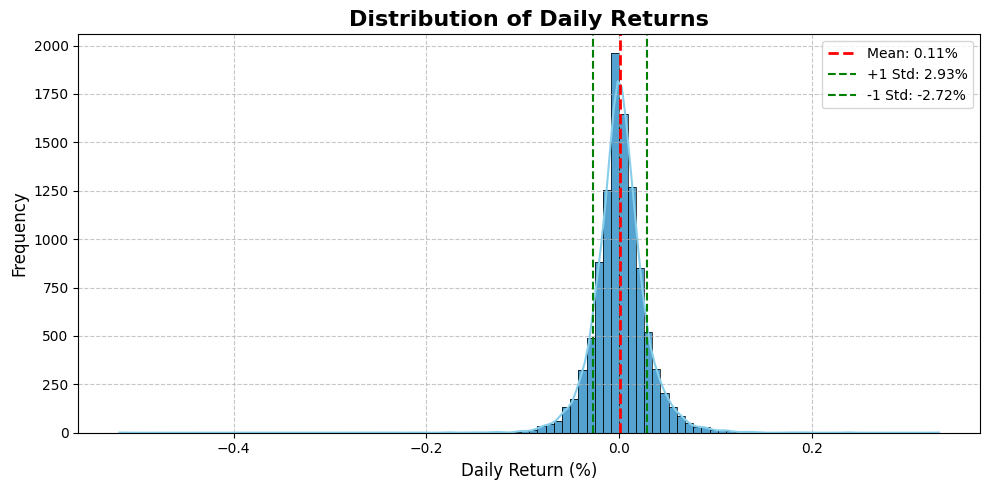

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate daily returns
df['Daily Return'].hist(bins=100, figsize=(10,5))

# Plot creation :
sns.histplot(df['Daily Return'].dropna(), bins=100, kde=True, color='skyblue', edgecolor='black')

# Adding title and text for axis x and y
plt.title('Distribution of Daily Returns', fontsize=16, fontweight='bold')
plt.xlabel('Daily Return (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add a grid with vertical lines for mean and Standard deviation
mean_return = df['Daily Return'].mean()
std_return = df['Daily Return'].std()

plt.axvline(mean_return, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_return:.2%}')
plt.axvline(mean_return + std_return, color='green', linestyle='--', linewidth=1.5, label=f'+1 Std: {(mean_return + std_return):.2%}')
plt.axvline(mean_return - std_return, color='green', linestyle='--', linewidth=1.5, label=f'-1 Std: {(mean_return - std_return):.2%}')

# Legend and grid :
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Display plot :
plt.tight_layout()
plt.show()

In [86]:
# Skewness & Kurtesis calculation :
skewness = skew(returns)
kurt = kurtosis(returns)  # Par défaut: excess kurtosis (kurt - 3)

print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurt:.4f}")

Skewness: -0.3752
Kurtosis: 18.1252


# Comment : lower daily return in % can be explained by the strong increase of stock values. It corresponds to the slightly asymetry to the left that plot is showing with Skewness of -0.3752, and to the very high Kurtosis index of 18.1252.

In [59]:
# 🔢 IV. Hypothesis Testing
    # Objective - Check whether an assumption (hypothesis) is statistically valid.
        # IV.1. Is the average return significantly different from zero?

from scipy import stats

print("Null hypothesis H0 : the average return = 0")
print("Alternative hypothesis H1: the return != 0")

# Retire les NaN
returns = df['Daily Return'].dropna()

# t-test
t_stat, p_value = stats.ttest_1samp(returns, 0)

print("t-stat:", t_stat, "| p-value:", p_value)

Null hypothesis H0 : the average return = 0
Alternative hypothesis H1: the return != 0
t-stat: 3.83673647719325 | p-value: 0.00012540306729067266


# Comments : 
# Very low p-value (well below 0.05): --> We reject the null hypothesis H₀.
# There is a statistically significant difference between the observed average return and zero.
# In other words, it is very unlikely that Apple’s average daily return is due to chance.
# The data shows that Apple’s stock has generated a significant average return, likely a positive one.

In [ ]:
df.reset_index(inplace=True)

df['Date'].dt.year

In [63]:
        # IV.2. Compare Two Decades - did Apple have a higher average return in the 2010s than in the 1990s?

returns_90 = df[(df['Date'].dt.year >= 1990) & (df['Date'].dt.year < 2000)]['Daily Return']
returns_10 = df[(df['Date'].dt.year >= 2010) & (df['Date'].dt.year < 2020)]['Daily Return']

t_stat, p_val = stats.ttest_ind(returns_90.dropna(), returns_10.dropna(), equal_var=False)
print("t-stat:", t_stat, "| p-value:", p_val)

t-stat: -0.15983424588676948 | p-value: 0.8730202295964293


# Interpretation of t-test result:
# t-statistic: -0.16 (approximately)
# p-value: 0.873

What does this mean?
 Hypotheses:
    Null hypothesis (H₀): The average daily return in the 2010s is equal to that in the 1990s.
    Alternative hypothesis (H₁): The average daily return in the 2010s is different from that in the 1990s.

Interpretation:
    The t-statistic is very close to zero → there is almost no difference between the two means.
    The p-value (0.873) is much greater than the usual threshold of 0.05, meaning we fail to reject the null hypothesis.

Conclusion:
    There is no statistically significant difference in the average daily return of Apple's stock between the 1990s and the 2010s.
    Even though the 2010s were visually associated with a dramatic rise in Apple's stock price, the average daily return does not significantly differ from that of the 1990s — possibly due to high volatility or rare but large jumps skewing the visual impression.

Date: Represents the date of the stock price.
Open: Represents the opening stock price on that date.
High: Represents the highest stock price on that date.
Low: Represents the lowest stock price on that date.
Close: Represents the closing stock price on that date.
Adj close: Represents the adjusted closing stock price on that date (taking into account corporate actions such as splits).
Volume: Represents the number of shares traded on that date.

WK4_DAY_4XP: June 26th, 2025

Day Mini Project: Advanced Statistical A.

Mini-project: Advanced Statistical Analysis of Apple Inc. Stock Data

# Project Description
Using the AAPL (Apple Inc.) stock dataset, conduct the following analyses:

# Initial Data Exploration
Load the dataset using Pandas. Check for null values and understand data types.
Examine the time series properties of the data (e.g., frequency, trends).

# Data Visualization
Utilize Matplotlib to plot closing prices and traded volume over time.
Create a candlestick chart to depict high and low prices.

# Statistical Analysis
Compute summary statistics (mean, median, standard deviation) for key columns.
Analyze closing prices with a moving average.

# Hypothesis Testing
Execute a t-test to compare average closing prices across different years.
Examine daily returns’ distribution and test for normality using SciPy.

# Advanced Statistical Techniques (Bonus)
Statistical Functions in NumPy: Employ NumPy’s statistical functions for in-depth stock data analysis.
E.g., Use convolve for moving averages, or np.corrcoef to explore correlations between financial metrics.
Analyze correlations between moving averages of closing prices and trading volume across time periods.

# Resources
Dataset: download it here Apple Stock Prices From 1981 to 2023
It may include data such as date, opening price, closing price, high and low prices, and trading volume.

This information can be used to study trends and patterns in the stock market and make informed investment decisions.

Date: Represents the date of the stock price.
Open: Represents the opening stock price on that date.
High: Represents the highest stock price on that date.
Low: Represents the lowest stock price on that date.
Close: Represents the closing stock price on that date.
Adj close: Represents the adjusted closing stock price on that date (taking into account corporate actions such as splits).
Volume: Represents the number of shares traded on that date.

# Project Submission
Submit a Jupyter Notebook with :

    All analysis code and visualizations.
    Detailed explanations of findings at each step.
    A comprehensive summary of insights, focusing on advanced statistical analysis.
    A ‘Reflection’ section detailing challenges and solutions.
    Suggested structure:

1. Data Loading and Exploration
2. Data Visualization
3. Statistical Analysis
4. Hypothesis Testing
5. Advanced Statistical Techniques (Bonus)
    - Signal Processing using SciPy
    - Statistical Functions in NumPy
6. Summary and Insights
7. Reflection

Guidance
Experiment with different filters and parameters in signal processing techniques.
Thoroughly understand each statistical function and its insights on the stock data.